<a href="https://colab.research.google.com/github/Vysh2024/Predicting-Hospital-Readmission-Risk-in-Diabetic-Patients-Using-Machine-Learning/blob/main/Copy_of_Capstone_Project_Predicting_Hospital_Readmission_Risk_in_Diabetic_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Capstone Project: Predicting Hospital Readmission Risk in Diabetic Patients**

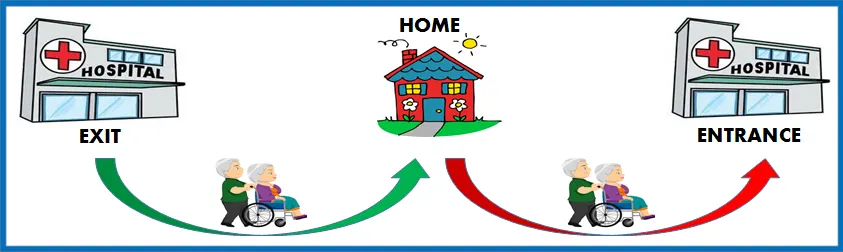



**Import** **Libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


***Load*** **and** **Explore** **Data**

In [ ]:

data = pd.read_csv("/content/gdrive/MyDrive/diabetic_data.csv")

# Display basic info
print("Dataset Shape:", data.shape)
print("\nColumns:\n", data.columns.tolist())
print("\nPreview:\n", data.head())

Dataset Shape: (17469, 50)

Columns:
 ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

Preview:
    encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-1

**Data** **cleaning**

In [ ]:

# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Drop columns that are not useful for prediction
data.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

# Check how many missing values remain
print("\nMissing values per column:\n", data.isnull().sum())



Missing values per column:
 race                          291
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          7
diag_2                        104
diag_3                        498
number_diagnoses                0
max_glu_serum               15754
A1Cresult                   14213
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone       

/tmp/ipython-input-1993658940.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('?', np.nan, inplace=True)


**Feature** **Engineering**

In [ ]:


# Convert target variable 'readmitted' into binary
# '<30' and '>30' = 1 (readmitted), 'NO' = 0 (not readmitted)
data['readmitted'] = data['readmitted'].replace({'NO': 0, '<30': 1, '>30': 1})

# Encode all categorical (string) columns
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

    print("Categorical columns encoded:", list(categorical_cols))


Categorical columns encoded: ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
Categorical columns encoded: ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', '

/tmp/ipython-input-136016837.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['readmitted'] = data['readmitted'].replace({'NO': 0, '<30': 1, '>30': 1})


 **Handle Missing Values and Scale Data**

In [ ]:


# Fill missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Scale numeric features
scaler = StandardScaler()
X = data_imputed.drop('readmitted', axis=1)
y = data_imputed['readmitted']
X_scaled = scaler.fit_transform(X)

print("After preprocessing, data shape:", X_scaled.shape)


After preprocessing, data shape: (17469, 44)


**Train-Test Split**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (13975, 44)
Testing set size: (3494, 44)


**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


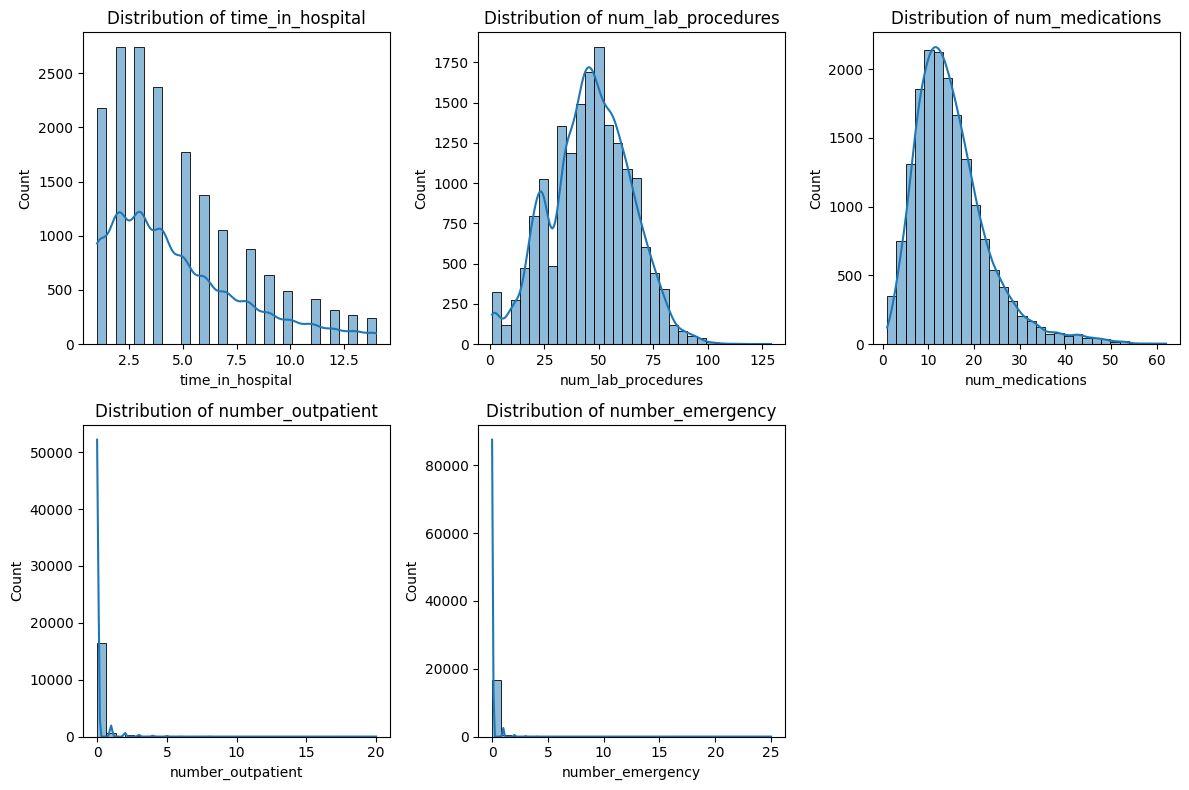

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1917754014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted', data=data, palette='Set2')


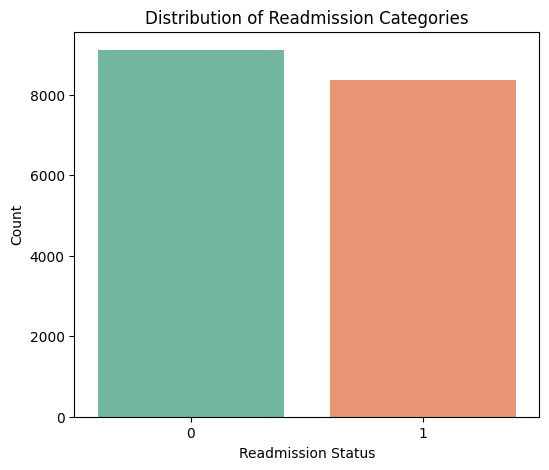

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='readmitted', data=data, palette='Set2')
plt.title('Distribution of Readmission Categories')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.show()


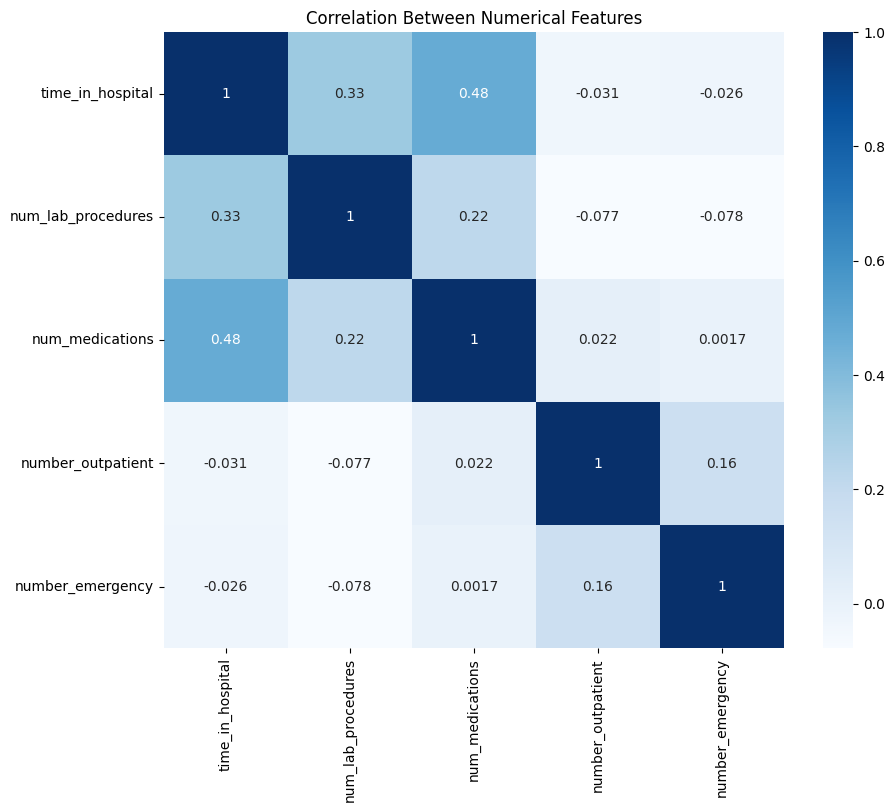

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Numerical Features')
plt.show()


/tmp/ipython-input-4067393693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='time_in_hospital', data=data, palette='magma')


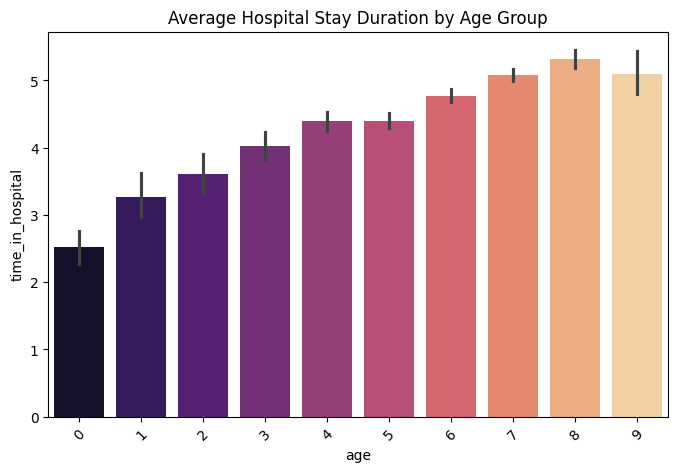

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='age', y='time_in_hospital', data=data, palette='magma')
plt.title('Average Hospital Stay Duration by Age Group')
plt.xticks(rotation=45)
plt.show()


**Logistic Regression**

Logistic Regression Accuracy: 0.6210646823125358

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.73      0.67      1811
           1       0.64      0.50      0.56      1683

    accuracy                           0.62      3494
   macro avg       0.62      0.62      0.61      3494
weighted avg       0.62      0.62      0.62      3494



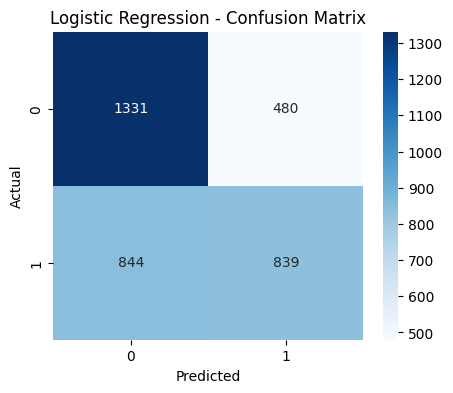

In [ ]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Random Forest Classifier**

Random Forest Accuracy: 0.6313680595306239

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66      1811
           1       0.63      0.57      0.60      1683

    accuracy                           0.63      3494
   macro avg       0.63      0.63      0.63      3494
weighted avg       0.63      0.63      0.63      3494



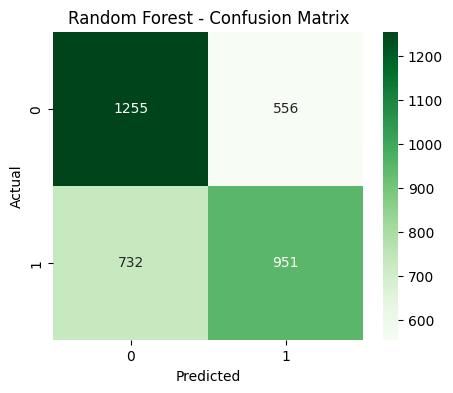

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**K-Nearest Neighbors**

KNN Accuracy: 0.5729822552947911

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.62      0.60      1811
           1       0.56      0.52      0.54      1683

    accuracy                           0.57      3494
   macro avg       0.57      0.57      0.57      3494
weighted avg       0.57      0.57      0.57      3494



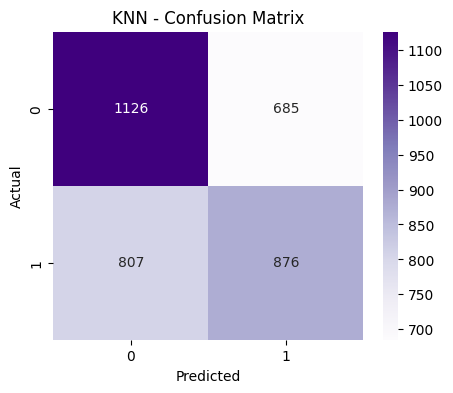

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap="Purples")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Compare All Models**



 FINAL MODEL PERFORMANCE
                 Model  Accuracy
0  Logistic Regression  0.621065
1        Random Forest  0.631368
2                  KNN  0.572982


/tmp/ipython-input-268332014.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


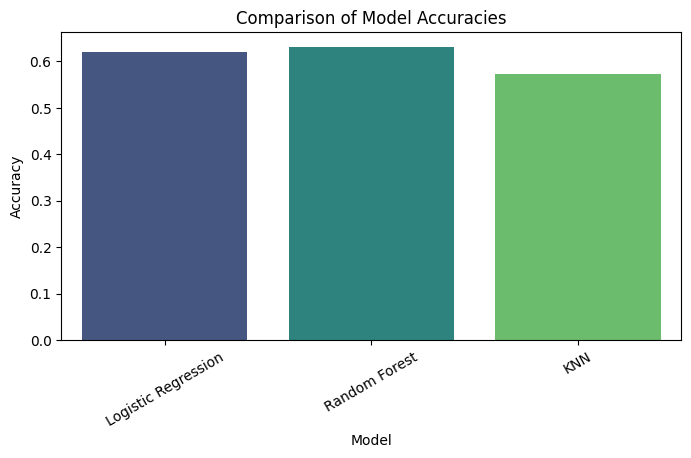

In [ ]:
model_results = {
      "Model": ["Logistic Regression", "Random Forest", "KNN"],
       "Accuracy": [
         accuracy_score(y_test, y_pred_log),
         accuracy_score(y_test, y_pred_rf),
         accuracy_score(y_test, y_pred_knn)
                      ]
                     }
results_df = pd.DataFrame(model_results)
print("\n\n FINAL MODEL PERFORMANCE")
print(results_df)

plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=30)
plt.show()

In [ ]:
print("\nFINAL CONCLUSION:")
print("Random Forest performed the best and is recommended for predicting readmission.")



FINAL CONCLUSION:
Random Forest performed the best and is recommended for predicting readmission.



Top Important Features:
                     Feature  Importance
7         num_lab_procedures    0.092777
15                    diag_3    0.087327
14                    diag_2    0.087275
13                    diag_1    0.086984
9            num_medications    0.084412
6           time_in_hospital    0.061753
2                        age    0.053083
12          number_inpatient    0.051589
16          number_diagnoses    0.048469
4   discharge_disposition_id    0.041892


/tmp/ipython-input-2463009757.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"].head(10), y=importance_df["Feature"].head(10), palette="magma")


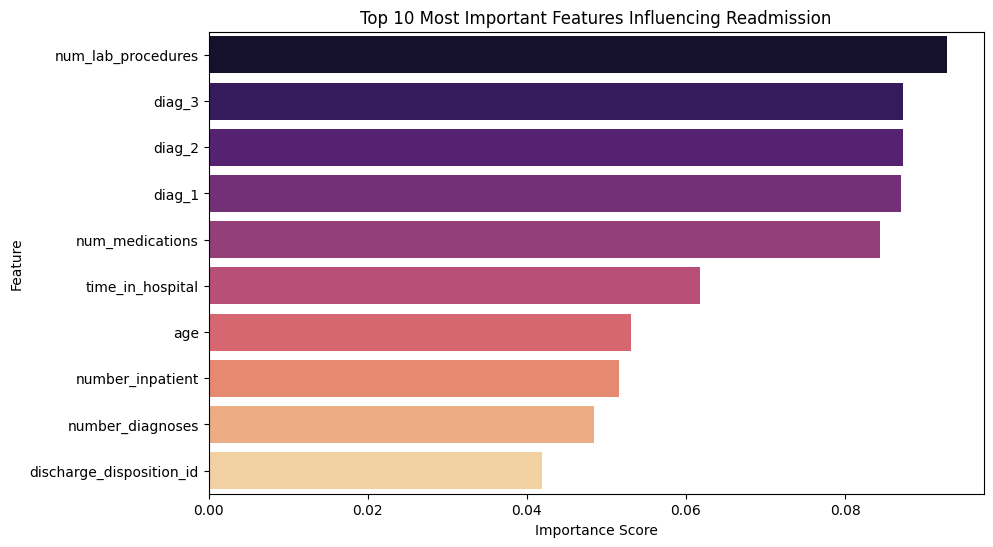

In [ ]:

import numpy as np

feature_importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
"Feature": features,
        "Importance": feature_importances
        }).sort_values(by="Importance", ascending=False)
print("\nTop Important Features:")
print(importance_df.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=importance_df["Importance"].head(10), y=importance_df["Feature"].head(10), palette="magma")
plt.title("Top 10 Most Important Features Influencing Readmission")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.6313680595306239

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66      1811
           1       0.63      0.57      0.60      1683

    accuracy                           0.63      3494
   macro avg       0.63      0.63      0.63      3494
weighted avg       0.63      0.63      0.63      3494


Confusion Matrix:
 [[1255  556]
 [ 732  951]]

AUC Score: 0.6883429743565515
